<a href="https://colab.research.google.com/github/tamayzengin/Machine-learning-algorhythms/blob/main/notebooks/polynomial_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd 
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
cd /content/drive/MyDrive/Colab Notebooks/DATA

/content/drive/MyDrive/Colab Notebooks/DATA


In [12]:
df = pd.read_csv('Advertising.csv')

In [13]:
X = df.drop('sales',axis=1)

In [14]:
y = df['sales']

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [17]:
# Converter "fits" to data, in this case, reads in every X column
# Then it "transforms" and ouputs the new polynomial data
poly_features = polynomial_converter.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# random_state: 
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression(fit_intercept=True)

In [22]:
model.fit(X_train,y_train)

LinearRegression()

In [23]:
test_predictions = model.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [26]:
df['sales'].mean()

14.0225

In [27]:
train_rmse_errors = []
test_rmse_errors= []

for d in range(1,10):
  poly_converter = PolynomialFeatures(degree=d,include_bias=True)
  poly_features = poly_converter.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
  model = LinearRegression()
  model.fit(X_train,y_train)

  train_pred =  model.predict(X_train)
  test_pred = model.predict(X_test)
  train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))

  train_rmse_errors.append(train_rmse)
  test_rmse_errors.append(test_rmse)

In [28]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292232,
 0.43393443569020657,
 0.46949224731176714,
 0.2812063154520143,
 0.32477507438982756,
 1.5208810648830775,
 0.15150070609924057,
 0.17187211718017767]

In [29]:
test_rmse_errors

[1.5161519375993882,
 0.6646431757268308,
 0.5803286825186187,
 1.2579853069311169,
 3.457942100312966,
 1.3750403135068139,
 539.7427147359965,
 3951.8857753920433,
 96218.25176592823]

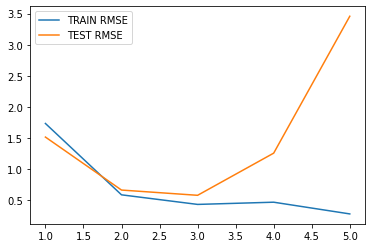

In [30]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')
plt.legend();

In [31]:
final_poly_converter = PolynomialFeatures(degree = 3, include_bias= True)

In [32]:
final_model = LinearRegression()

In [33]:
fully_converted_X = final_poly_converter.fit_transform(X)
model.fit(fully_converted_X,y)

LinearRegression()

In [34]:
from joblib import dump,load

In [35]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [36]:
dump(final_poly_converter,'final_poly_converter.joblib')

['final_poly_converter.joblib']

In [37]:
loaded_converter = load('final_poly_converter.joblib')

In [38]:
loaded_model = load('final_poly_model.joblib')

In [39]:
campaign  = [[149,22,10]]

In [40]:
campaign_poly = loaded_converter.fit(campaign)

In [41]:
campaign_poly.transform(campaign).shape

(1, 20)